## Answer 1

In [1]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.pyplot import figure
from matplotlib import colors
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

#### def normalize(x):
    return x/((x.max()-x.min())*1.0)

In [12]:
def solve(images):
    for img in images:
        fig = plt.figure(figsize=(13,13));
        img = mpimg.imread(img)
        plt.imshow(img);
        
        x=np.matrix(np.arange(0,321,1))
        channel_4=np.repeat(x, 481, axis=0).T
        channel_4=np.expand_dims(channel_4, axis=2)
        feature=np.concatenate([img,channel_4],axis=-1)
        
        x=np.matrix(np.arange(0,481,1))
        channel_5=np.repeat(x, 321, axis=0)
        channel_5=np.expand_dims(channel_5, axis=2)
        feature=np.concatenate([feature,channel_5],axis=-1)
        feature=feature*1.0
        
        for channel in range(feature.shape[2]):
            feature[:,:,channel]=(normalize(feature[:,:,channel]))
            
        feature=feature.reshape((-1,5))
        feature.shape
        
        for clusters in [2,3,4,5]:
            fig = plt.figure(figsize=(13,13));
            kmeans = KMeans(n_clusters=clusters, random_state=0).fit(feature)
            bitmap=(kmeans.labels_.reshape(img.shape[0],img.shape[1]))
            plt.imshow(bitmap);
            plt.show()
            
            
        for clusters in [2,3,4,5]:
            fig = plt.figure(figsize=(13,13));
            gmm = GaussianMixture(n_components=clusters).fit(feature)
            labels = gmm.predict(feature)
            bitmap=(labels.reshape(img.shape[0],img.shape[1]))
            plt.imshow(bitmap);
            plt.show()

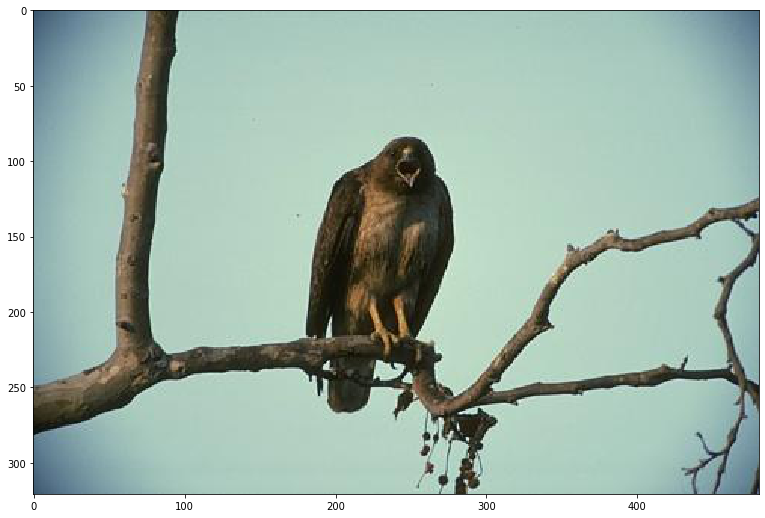

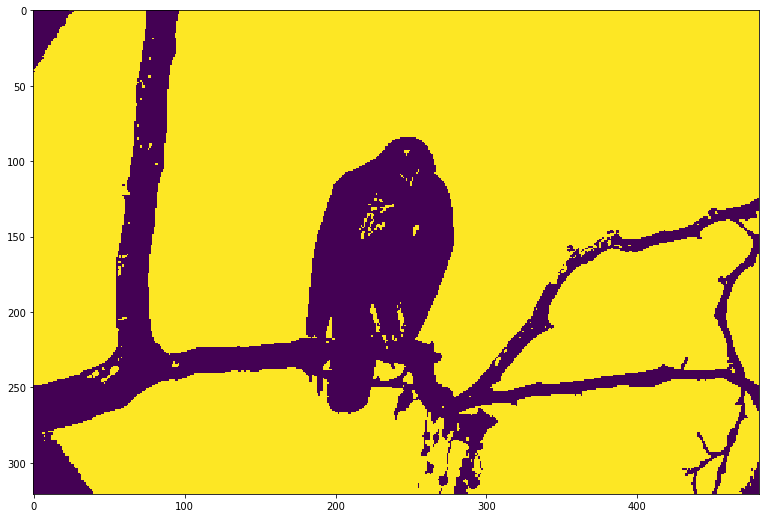

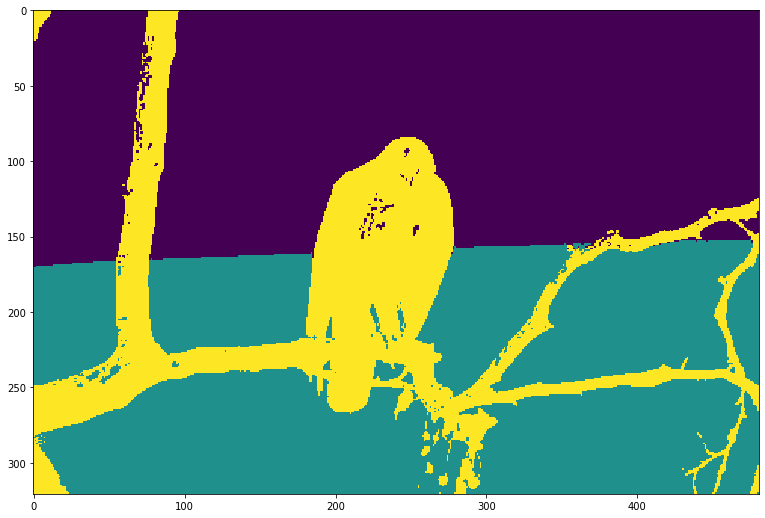

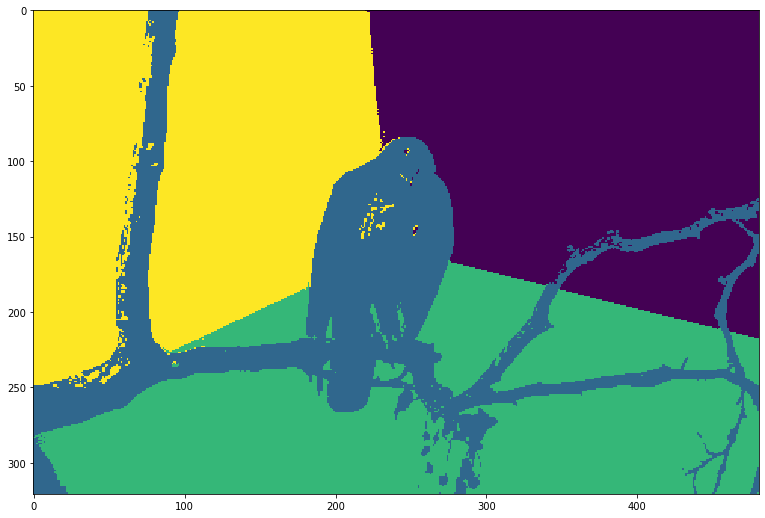

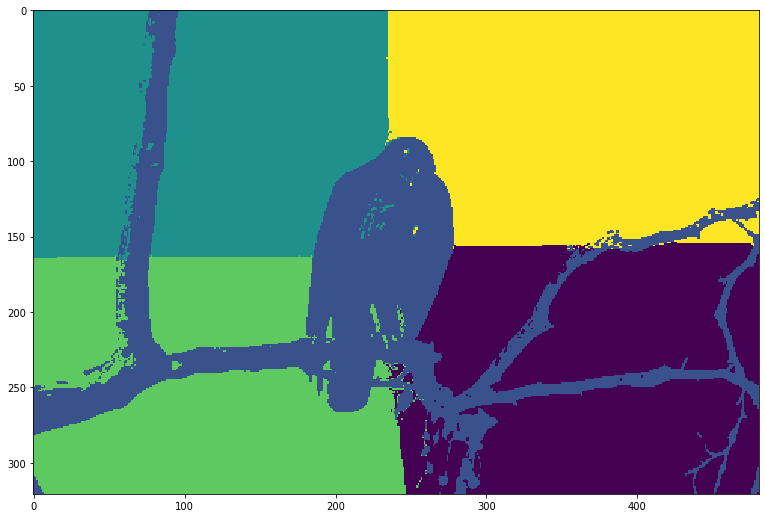

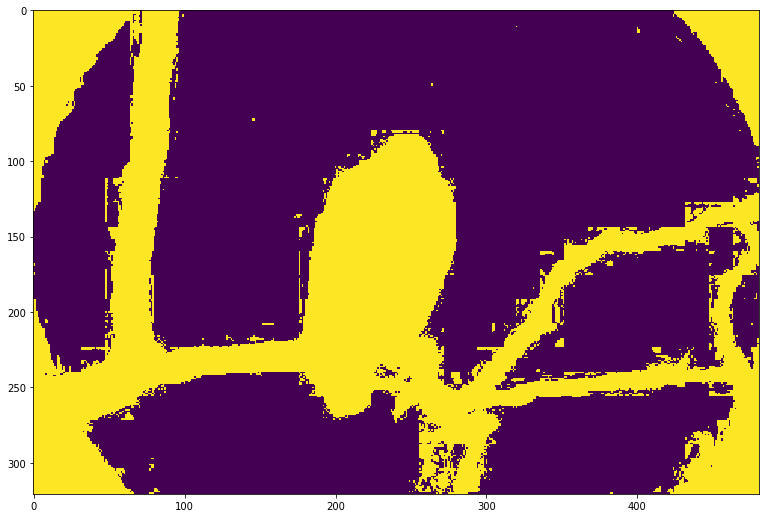

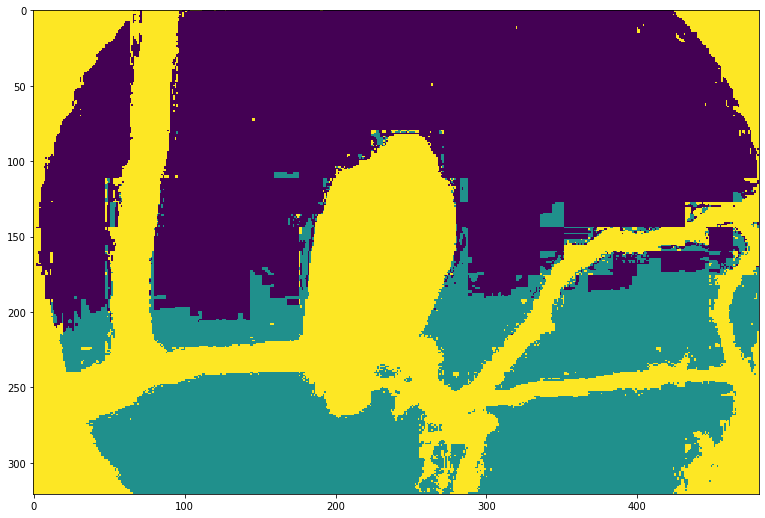

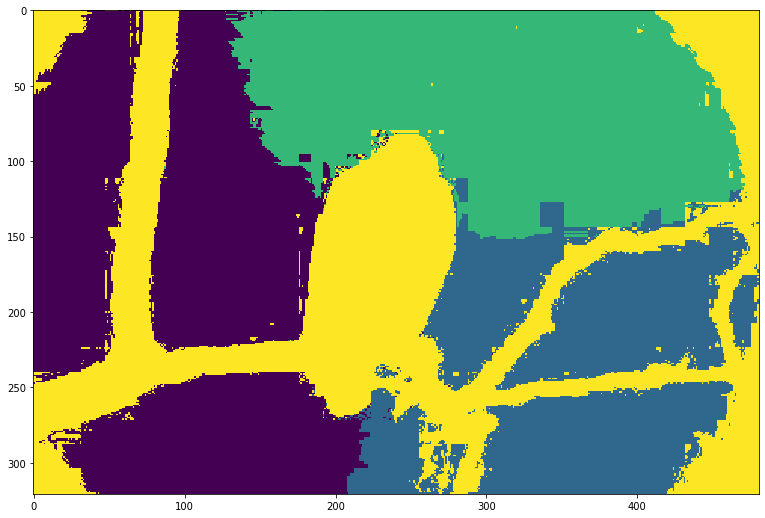

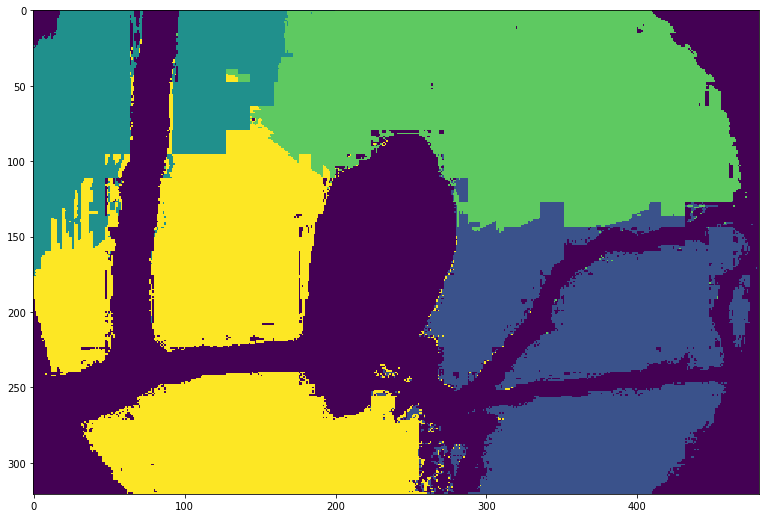

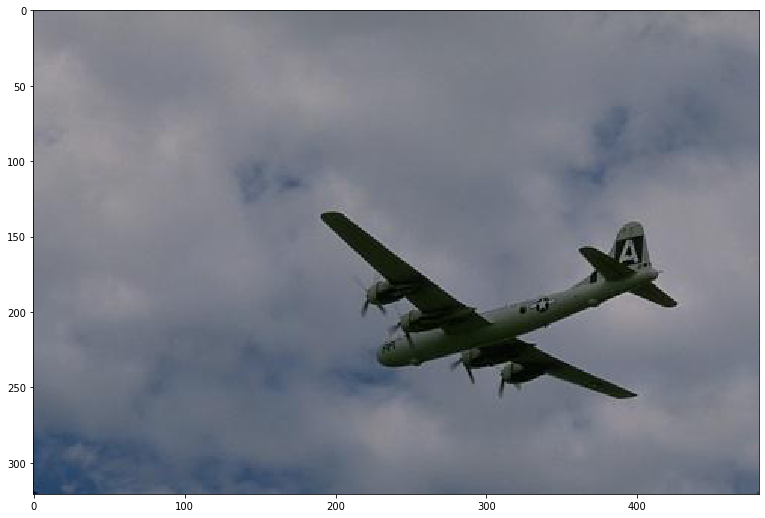

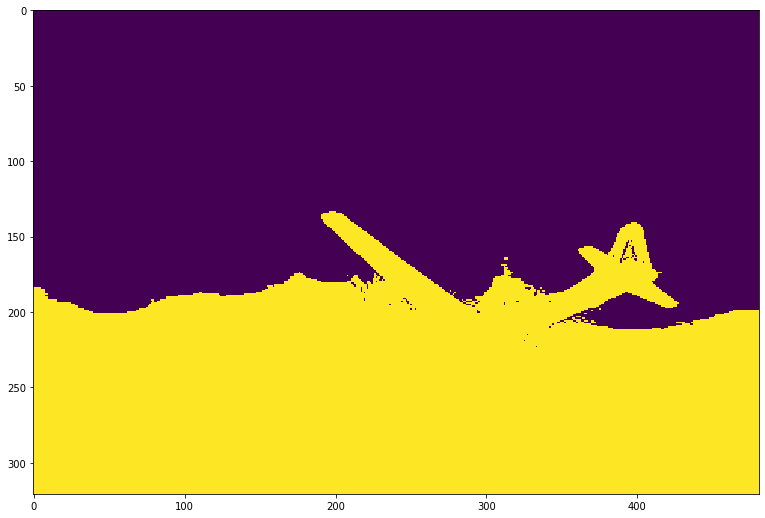

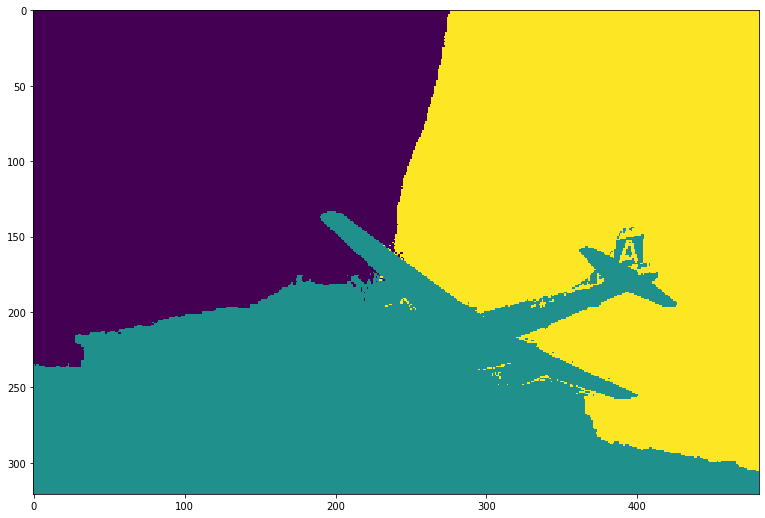

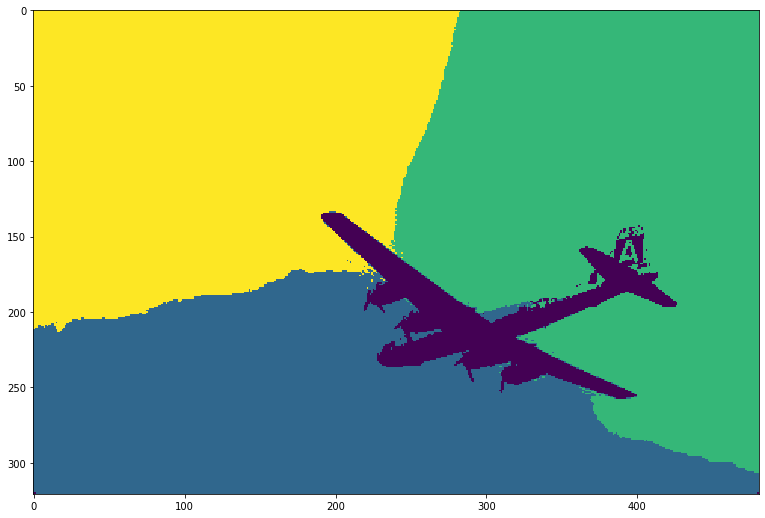

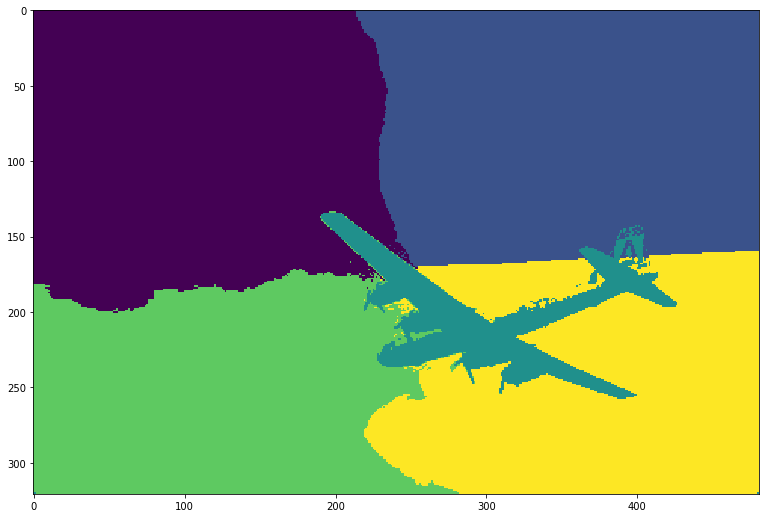

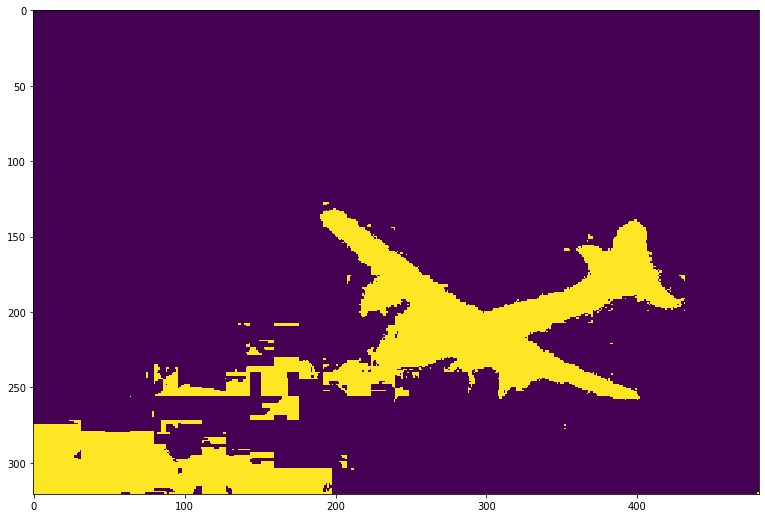

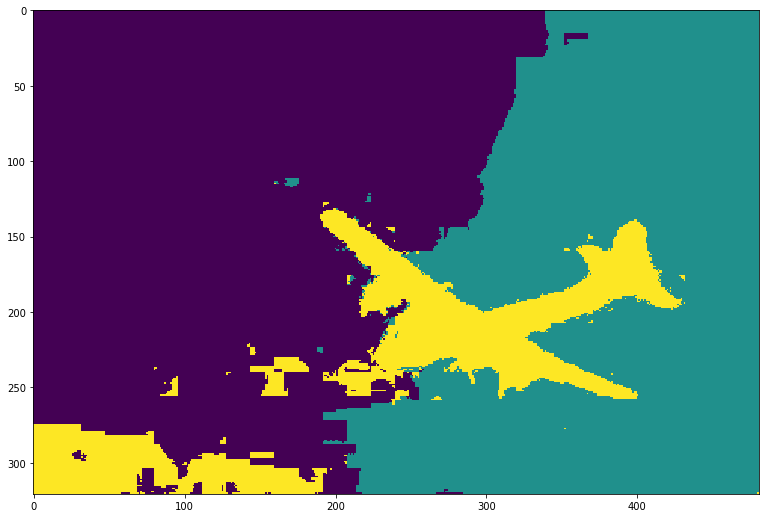

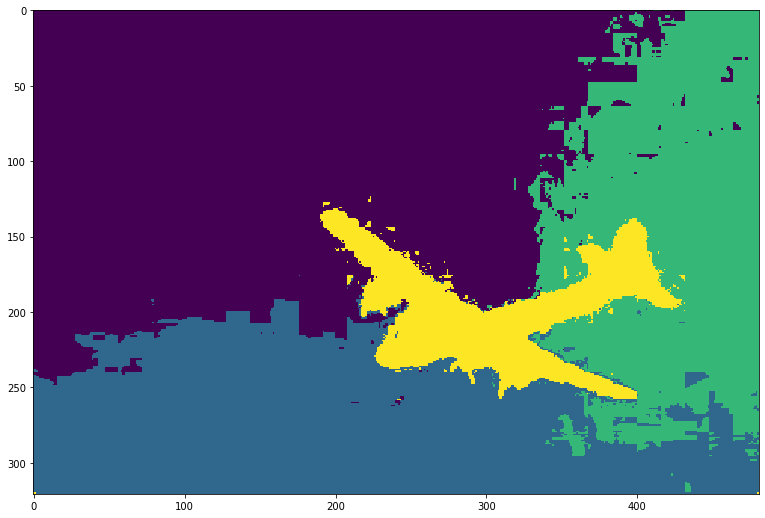

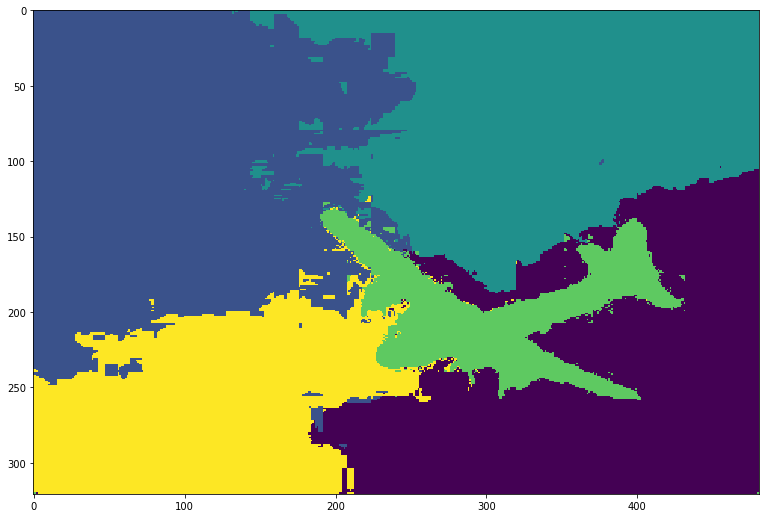

In [13]:
solve(['EECE5644_2019Fall_Homework4Questions_42049_colorBird.jpg','EECE5644_2019Fall_Homework4Questions_3096_colorPlane.jpg'])

## Answer 2

In [32]:
def sample_class2():
    rad=np.random.uniform(2,3)
    theta=np.random.uniform(-np.pi,np.pi)
    return np.matrix([rad*np.cos(theta),rad*np.sin(theta)])

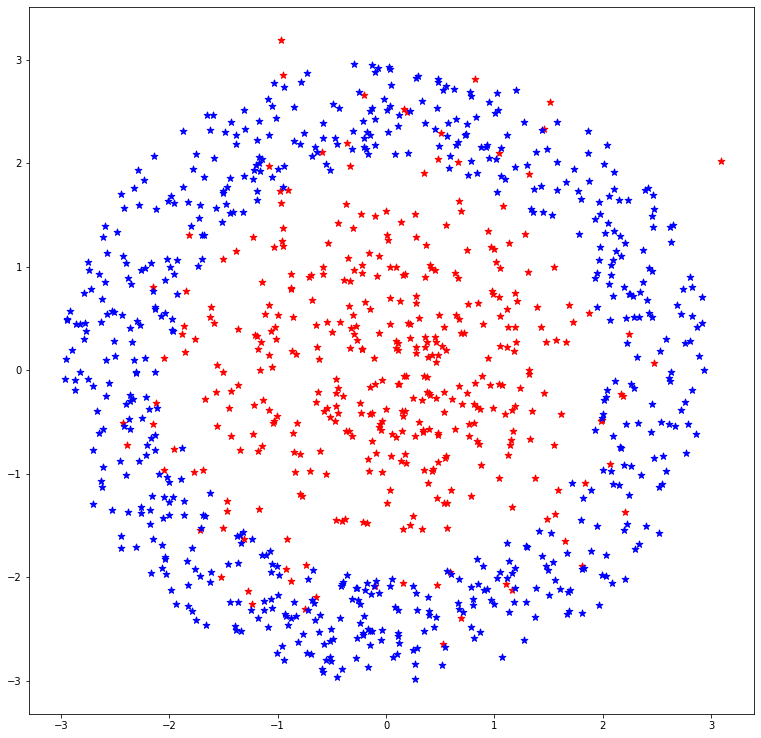

In [33]:
fig = plt.figure(figsize=(13,13));
prior=0.35
zero_mean=[0,0]
cov=[[1,0],[0,1]]
samples_class1=[]
samples_class2=[]
for num in range(1000):    
    uniform_sample=np.random.uniform()
    if uniform_sample<prior:
        sample=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()
        samples_class1.append(sample)
    else:
        sample=sample_class2().T
        samples_class2.append(sample)
samples_class1=np.hstack(samples_class1)
samples_class2=np.hstack(samples_class2)

a=np.squeeze(np.asarray(samples_class1.transpose()[:,1]))
b=np.squeeze(np.asarray(samples_class1.transpose()[:,0]))

c=np.squeeze(np.asarray(samples_class2.transpose()[:,1])) 
d=np.squeeze(np.asarray(samples_class2.transpose()[:,0]))

plt.scatter(b,a,color='r',marker='*',label='class 1',s=50)
plt.scatter(d,c,color='b',marker='*',label='class 1',s=50)



In [34]:
X=np.hstack([samples_class1,samples_class2])
X=X.T
X=np.squeeze(np.asarray(X))

In [35]:
X.shape

(1000, 2)

In [36]:
y = np.hstack((np.zeros(samples_class1.shape[1]), np.ones(samples_class2.shape[1])))

In [37]:
y.shape

(1000,)

In [8]:
from sklearn.svm import SVC

[LibSVM][[-7.96639822e-07  1.34581747e-06]] [1.00000011] 0.0001


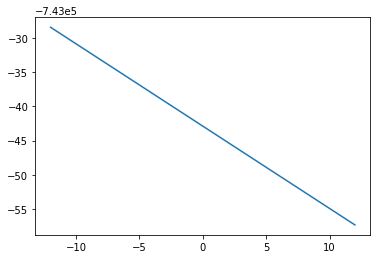

[LibSVM][[-5.39136800e-06  8.35331463e-06]] [0.99999249] 0.001


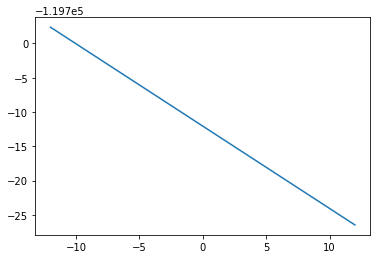

[LibSVM][[4.85037884e-05 1.64860534e-04]] [1.00002579] 0.01


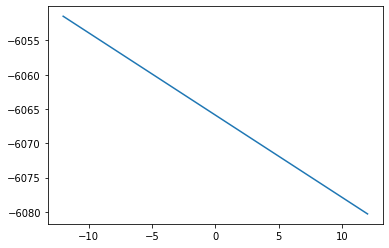

[LibSVM][[-1.86228373e-06 -1.60631189e-07]] [1.00000047] 0.1


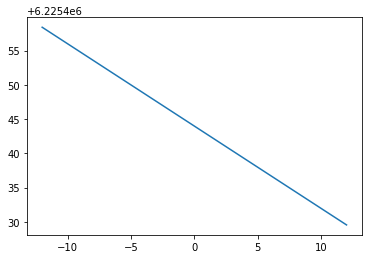

[LibSVM][[2.54106135e-05 2.35663223e-05]] [0.99998364] 1.0


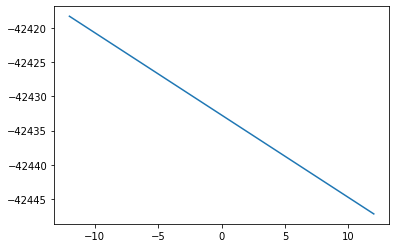

[LibSVM][[9.78942771e-06 2.16660999e-06]] [1.00000264] 10.0


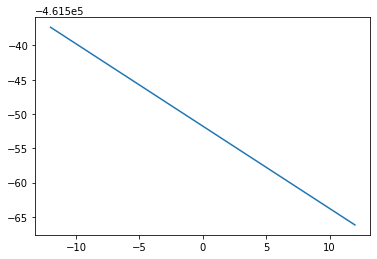

[LibSVM][[ 5.71828829e-05 -4.58728823e-06]] [1.00004997] 100.0


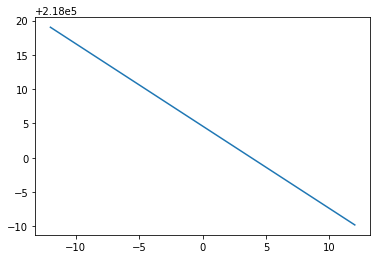

In [28]:
c=0.00001
while (c<100):
    c=c*10
    model = SVC(kernel='linear',C=c,verbose=True)
    model.fit(X, y) 
    print (model.coef_,model.intercept_,c)
    w=model.coef_[0]
    xx = np.linspace(-12,12)
    yy = a * xx - model.intercept_[0] / w[1]

    h0 = plt.plot(xx, yy)

    #plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.show()

In [ ]:
model.intercept_

In [57]:
y_pred=model.predict(X)
np.sum(y_pred==y)

657

array([[-9.7171208e-06,  3.5516513e-06]])

In [ ]:
model.predict

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [74]:
y_pred=model.predict(X)
np.sum(y_pred==y)

643

In [32]:
def plot_SVM():
    from matplotlib.pyplot import figure
    fig = plt.figure(figsize=(15,10));
    plt.xlabel('Variable x1',size=13)
    plt.ylabel('Variable x2',size=13)
    fig.suptitle('Logistic Regression decision boundary for data from 2 Gaussians', fontsize=15)
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1] # True Positive for class 0 and class 1 respectively
    # tp0 is boolean with "tp and class=0"
    X0, X1 = X[y == 0], X[y == 1] # points 
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    
    # class 0: dots
    #plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='x', color='red')
    #plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x', s=20, color='#990000')  # dark red
    
    # class 1: dots
    #plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='white')
    #plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='*', s=20, color='#000099')  # dark blue
    plt.scatter(4,4,color='blue')
    plt.scatter(-4,-4,color='blue')
    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z=model.predict_proba((np.c_[xx.ravel(), yy.ravel()]))[:,1]
    Z=Z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, cmap='plasma',norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black');
    plt.subplots_adjust(top=.95);
    return Z

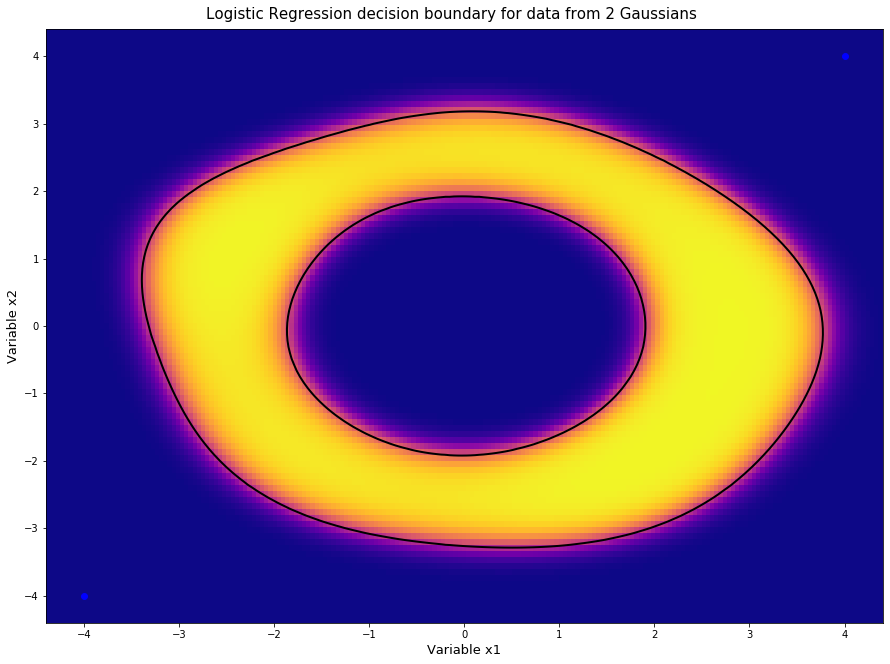

In [33]:
Z=plot_SVM()

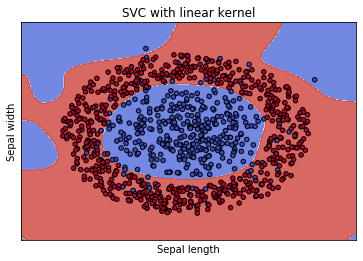

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 100  # SVM regularization parameter
clf = (svm.SVC(kernel='rbf', C=C,gamma='auto'))
clf.fit(X, y)

# title for the plots
titles = ('SVC with linear kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for title, ax in [(titles, sub)]:
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()